### 추가적인 EDA 시행

In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('project_data3.csv')
data

,지점,발생해역,발생유형,발생원인,기상상태,선 종,월별,시간대별,사고규모,일시,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),파주기(sec)
0,여수,영해,전복,운항부주의,양호,낚시어선,12,6,2.659574,2011-12-31 6:00,4.9,7.5,1027.9,51.0,4.8,1.1,6.4
1,부산,항계내,화재,정비불량,양호,어선,12,21,0.030538,2011-12-30 21:00,2.7,4.9,1028.6,58.0,8.6,2.2,6.4
2,속초,영해,침수,정비불량,양호,어선,12,11,0.333333,2011-12-30 11:00,6.7,9.6,1030.0,51.0,5.1,2.8,4.3
3,목포,영해,기타,운항부주의,양호,여객선,12,14,0.186235,2011-12-29 14:00,8.8,11.8,1028.4,64.0,4.7,2.5,6.4
4,목포,영해,기타,관리소홀,양호,기타,12,13,0.238095,2011-12-29 13:00,8.8,11.5,1029.4,63.0,4.8,3.1,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16967,울산,항계 내,기관손상,정비불량,양호,낚시어선,1,17,2.333333,2021-01-01 17:00,7.0,9.7,1023.9,56.0,5.0,2.3,9.1
16968,울산,영해,기관손상,정비불량,양호,어선,1,15,0.518135,2021-01-01 15:00,6.3,8.9,1023.9,55.0,4.4,3.0,8.0
16969,통영,협수로,기관손상,정비불량,양호,낚시어선,1,12,2.311248,2021-01-01 12:00,8.0,10.3,1027.0,62.0,3.0,1.3,3.4
16970,여수,영해,충돌,운항부주의,양호,어선,1,11,0.500000,2021-01-01 11:00,6.5,9.6,1027.9,59.0,4.5,1.7,7.1


In [5]:
data['발생원인'].value_counts()

정비불량       6649
운항부주의      5443
관리소홀       1760
기타          874
기상악화        709
연료고갈        381
안전부주의       326
화기취급부주의     312
기타          174
배터리 방전      134
원인미상        114
적재불량         59
재질불량         37
Name: 발생원인, dtype: int64

In [6]:
data = data.replace(['운항부주의', '안전부주의'],'운항과실')
data = data.replace(['정비불량', '화기취급부주의', '적재불량', '재질불량'], '취급불량 및 결함')
data = data.replace(['관리소홀', '배터리 방전', '연료고갈'],'관리문제')
data = data.replace(['기상악화'], '기상문제')
data = data.replace(['기타', '기타 ', '원인미상'], '기타')
data

,지점,발생해역,발생유형,발생원인,기상상태,선 종,월별,시간대별,사고규모,일시,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),파주기(sec)
0,여수,영해,전복,운항과실,양호,낚시어선,12,6,2.659574,2011-12-31 6:00,4.9,7.5,1027.9,51.0,4.8,1.1,6.4
1,부산,항계내,화재,취급불량 및 결함,양호,어선,12,21,0.030538,2011-12-30 21:00,2.7,4.9,1028.6,58.0,8.6,2.2,6.4
2,속초,영해,침수,취급불량 및 결함,양호,어선,12,11,0.333333,2011-12-30 11:00,6.7,9.6,1030.0,51.0,5.1,2.8,4.3
3,목포,영해,기타,운항과실,양호,여객선,12,14,0.186235,2011-12-29 14:00,8.8,11.8,1028.4,64.0,4.7,2.5,6.4
4,목포,영해,기타,관리문제,양호,기타,12,13,0.238095,2011-12-29 13:00,8.8,11.5,1029.4,63.0,4.8,3.1,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16967,울산,항계 내,기관손상,취급불량 및 결함,양호,낚시어선,1,17,2.333333,2021-01-01 17:00,7.0,9.7,1023.9,56.0,5.0,2.3,9.1
16968,울산,영해,기관손상,취급불량 및 결함,양호,어선,1,15,0.518135,2021-01-01 15:00,6.3,8.9,1023.9,55.0,4.4,3.0,8.0
16969,통영,협수로,기관손상,취급불량 및 결함,양호,낚시어선,1,12,2.311248,2021-01-01 12:00,8.0,10.3,1027.0,62.0,3.0,1.3,3.4
16970,여수,영해,충돌,운항과실,양호,어선,1,11,0.500000,2021-01-01 11:00,6.5,9.6,1027.9,59.0,4.5,1.7,7.1


In [7]:
data['발생원인'].value_counts()

취급불량 및 결함    7057
운항과실         5769
관리문제         2275
기타           1162
기상문제          709
Name: 발생원인, dtype: int64

In [8]:
data.drop(['발생유형', '일시'], axis=1, inplace=True)

In [9]:
data

,지점,발생해역,발생원인,기상상태,선 종,월별,시간대별,사고규모,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),파주기(sec)
0,여수,영해,운항과실,양호,낚시어선,12,6,2.659574,4.9,7.5,1027.9,51.0,4.8,1.1,6.4
1,부산,항계내,취급불량 및 결함,양호,어선,12,21,0.030538,2.7,4.9,1028.6,58.0,8.6,2.2,6.4
2,속초,영해,취급불량 및 결함,양호,어선,12,11,0.333333,6.7,9.6,1030.0,51.0,5.1,2.8,4.3
3,목포,영해,운항과실,양호,여객선,12,14,0.186235,8.8,11.8,1028.4,64.0,4.7,2.5,6.4
4,목포,영해,관리문제,양호,기타,12,13,0.238095,8.8,11.5,1029.4,63.0,4.8,3.1,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16967,울산,항계 내,취급불량 및 결함,양호,낚시어선,1,17,2.333333,7.0,9.7,1023.9,56.0,5.0,2.3,9.1
16968,울산,영해,취급불량 및 결함,양호,어선,1,15,0.518135,6.3,8.9,1023.9,55.0,4.4,3.0,8.0
16969,통영,협수로,취급불량 및 결함,양호,낚시어선,1,12,2.311248,8.0,10.3,1027.0,62.0,3.0,1.3,3.4
16970,여수,영해,운항과실,양호,어선,1,11,0.500000,6.5,9.6,1027.9,59.0,4.5,1.7,7.1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16972 entries, 0 to 16971
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지점           16972 non-null  object 
 1   발생해역         16972 non-null  object 
 2   발생원인         16972 non-null  object 
 3   기상상태         16972 non-null  object 
 4   선 종          16964 non-null  object 
 5   월별           16972 non-null  int64  
 6   시간대별         16972 non-null  int64  
 7   사고규모         16847 non-null  float64
 8   풍속(m/s)      16972 non-null  float64
 9   GUST풍속(m/s)  16972 non-null  float64
 10  현지기압(hPa)    16972 non-null  float64
 11  습도(%)        16972 non-null  float64
 12  기온(°C)       16972 non-null  float64
 13  최대파고(m)      16972 non-null  float64
 14  파주기(sec)     16972 non-null  float64
dtypes: float64(8), int64(2), object(5)
memory usage: 1.9+ MB


In [12]:
data.describe()

,월별,시간대별,사고규모,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),파주기(sec)
count,16972.000000,16972.000000,16847.000000,16972.000000,16972.000000,16972.000000,16972.000000,16972.000000,16972.000000,16972.000000
mean,6.948444,11.663681,1.350603,5.495027,7.268914,1015.706613,75.442159,16.412259,1.529892,5.483039
std,3.301943,5.538262,6.663009,3.347573,4.503283,7.992828,15.874897,7.112342,1.272201,2.042203
min,1.000000,0.000000,0.000000,0.000000,0.000000,957.100000,0.000000,-33.942124,0.000000,1.900000
25%,4.000000,8.000000,0.074074,3.000000,4.000000,1009.800000,64.000000,11.100000,0.800000,4.000000
50%,7.000000,12.000000,0.400802,5.000000,6.500000,1015.600000,78.000000,17.000000,1.200000,5.300000
75%,10.000000,16.000000,1.003344,7.400000,9.600000,1021.700000,89.000000,22.200000,1.900000,6.525000
max,12.000000,23.000000,300.000000,26.800000,84.900000,1041.612273,100.000000,34.800000,15.300000,24.800000


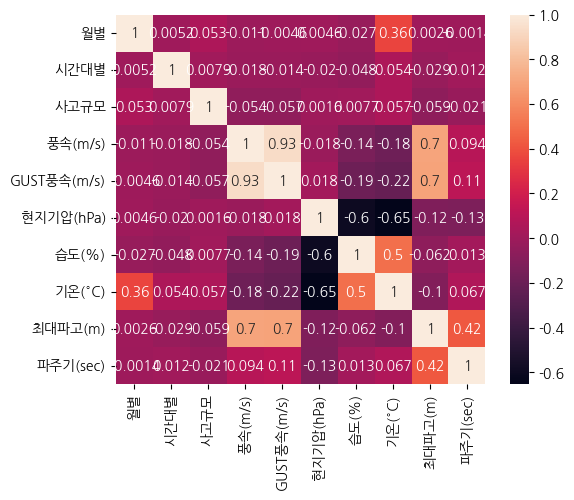

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data=data.corr(), square=True, annot=True, cbar=True)
plt.show()

### displot을 활용하여 연속형변수를 기준으로 하여 발생유형이 얼마나 다른지를 확인

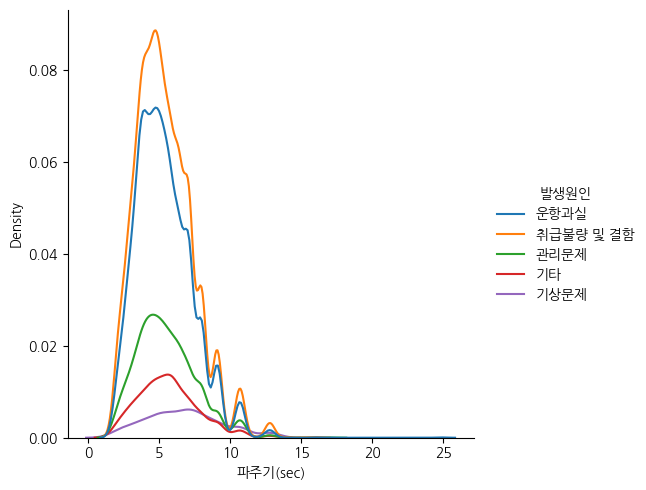

In [14]:
sns.displot(x='파주기(sec)', hue = '발생원인', kind='kde', data=data)

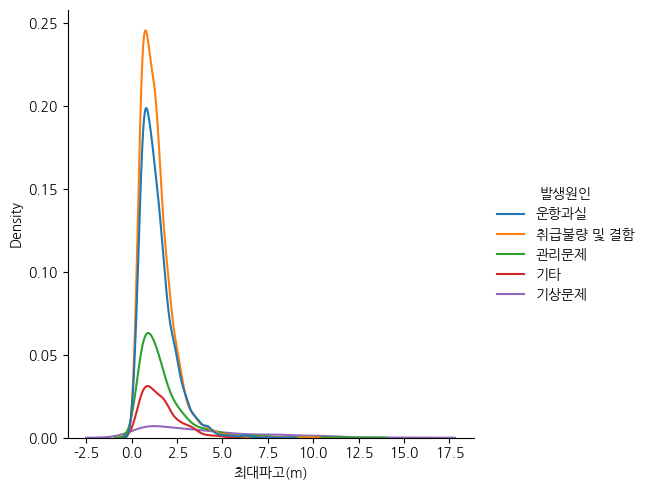

In [15]:
sns.displot(x='최대파고(m)', hue = '발생원인', kind='kde', data=data)

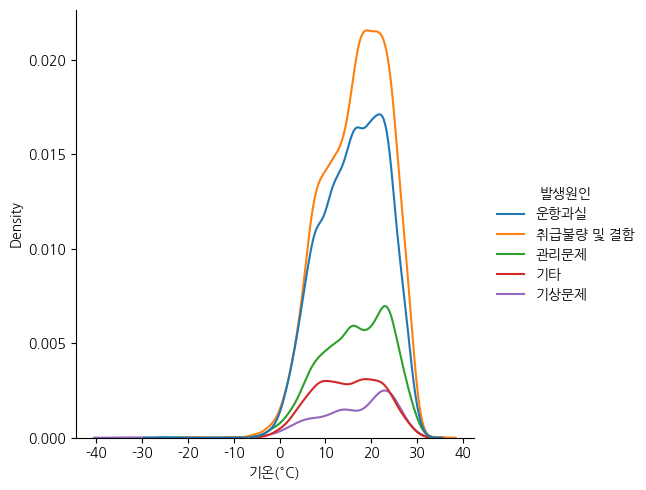

In [16]:
sns.displot(x='기온(°C)', hue = '발생원인', kind='kde', data=data)

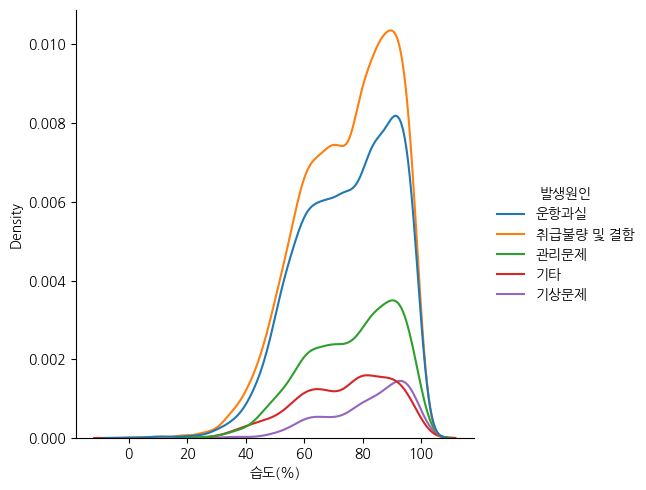

In [17]:
sns.displot(x='습도(%)', hue = '발생원인', kind='kde', data=data)

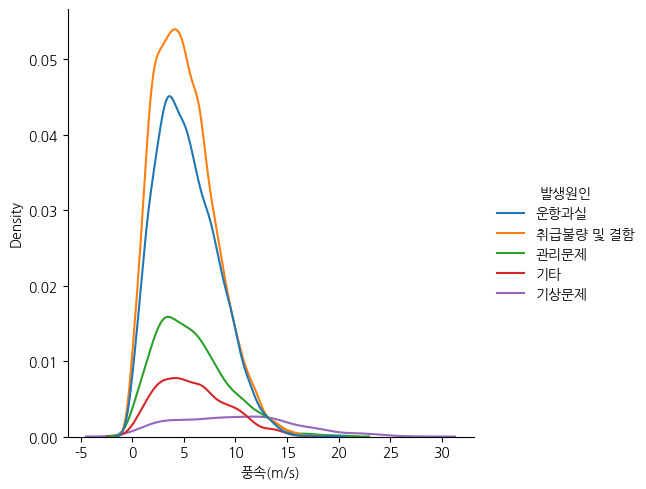

In [18]:
sns.displot(x='풍속(m/s)', hue = '발생원인', kind='kde', data=data)

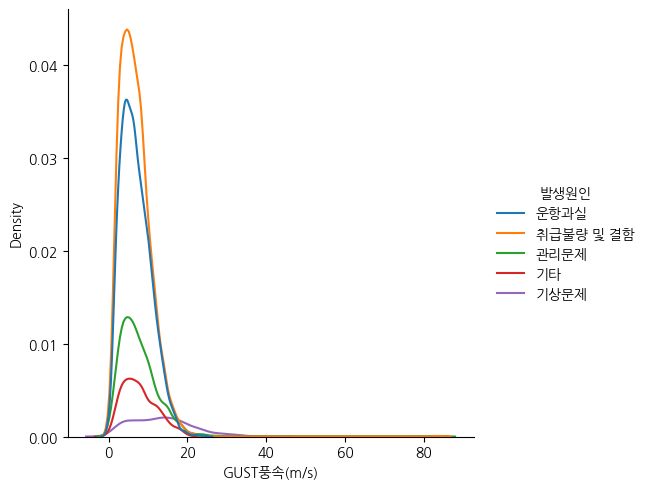

In [19]:
sns.displot(x='GUST풍속(m/s)', hue = '발생원인', kind='kde', data=data)

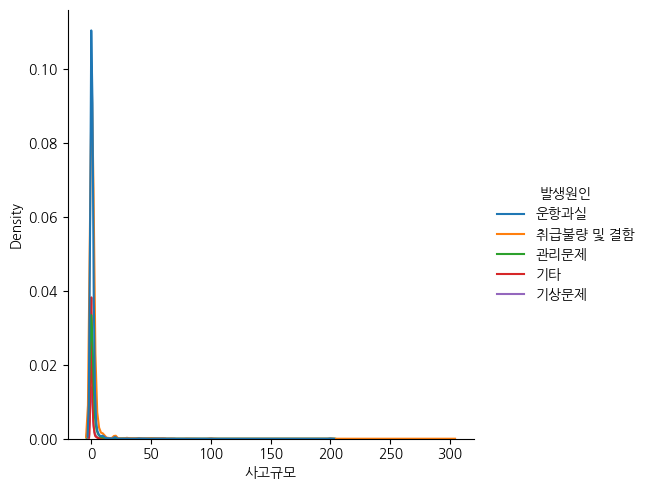

In [23]:
sns.displot(x='사고규모', hue = '발생원인', kind='kde', data=data)

### 추가적으로 범주형 별로 발생유형이 어떻게 다른지 보고자 countplot을 이용하여 추이 판단
- 밑에 제시된 그래프에서 유독 분포가 다름을 확인

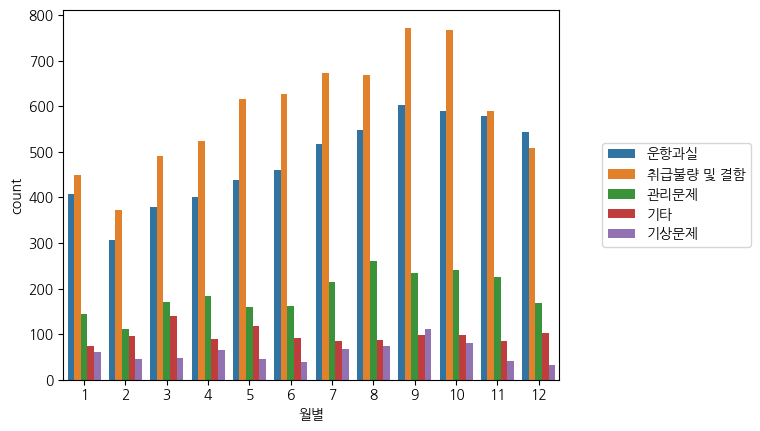

In [20]:
sns.countplot(data = data, x = "월별", hue = "발생원인")
plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5))

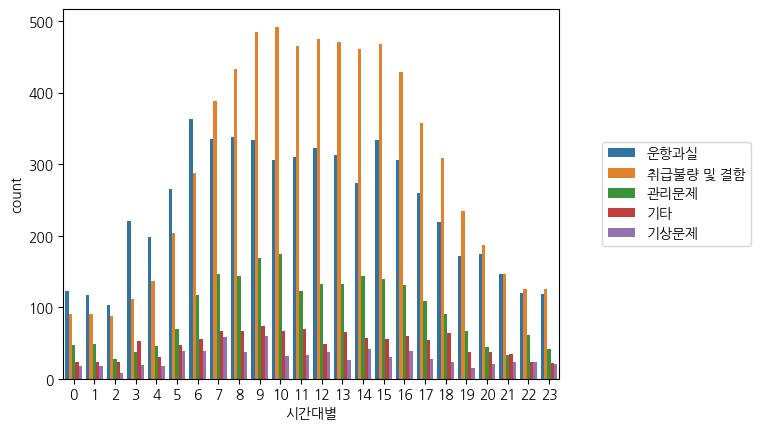

In [21]:
sns.countplot(data = data, x = "시간대별", hue = "발생원인")
plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5))

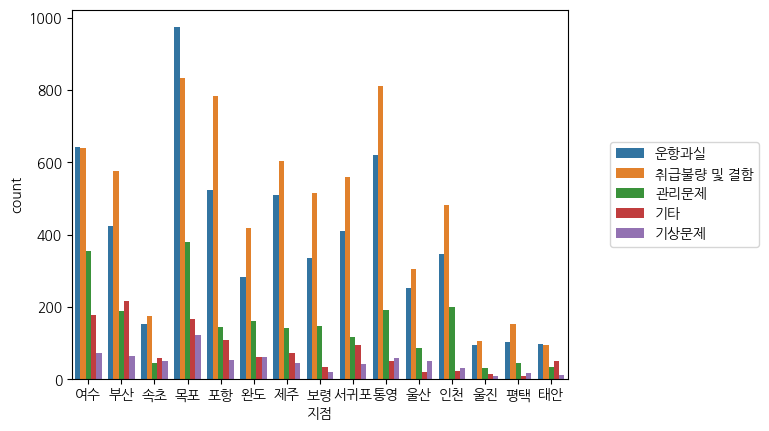

In [22]:
sns.countplot(data = data, x = "지점", hue = "발생원인")
plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5))

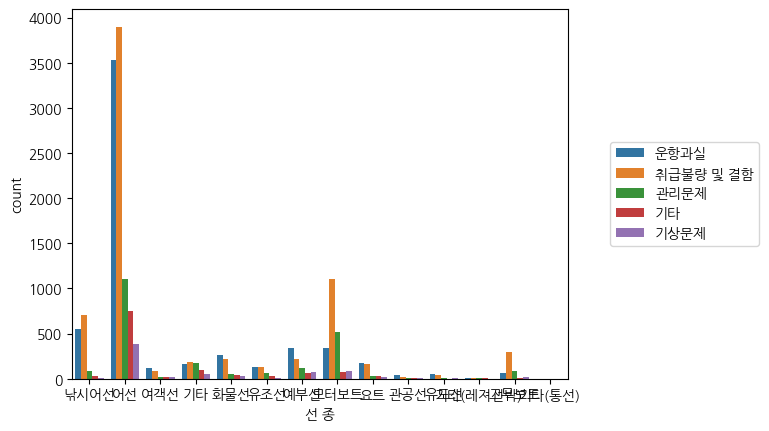

In [24]:
sns.countplot(data = data, x = "선 종", hue = "발생원인")
plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5))